## Classification

The process of organising a classifier:

1. Organise and clean the dataset
2. Divide the datset into training and testing subsets
3. Use the classifier to associate feature attributes within the training dataset to known classifications
4. Test the strength of the model fit by predicting the classifications within the test dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places

First of all, read in the data required for the classifications

In [2]:
data = pd.read_csv("Data/Socioeconomic_Data/socioeconomic_all.csv")
data

,Unnamed: 0,MSOA code,Net annual income (£),percent_unemployed,Pop_Per_Hectare,percent_at_or_above_qual_level_4,perc_households_owned,avg_number_of_bedrooms,perc_bad_health,perc_employed_females_working_fulltime,mean_age,perc_christian,perc_non_religious,perc_higher_manag_admin_prof,log_zscore_kmeans_cluster
0,0,E02004297,"32,200.0000",3.2000,5.2000,26.7000,77.3803,2.8000,6.7089,61.3000,42.2000,72.2000,21.3000,9.2000,2
1,1,E02004290,"33,000.0000",3.0000,6.6000,25.1000,84.7895,2.9000,4.6146,55.4000,41.0000,74.8000,19.8000,9.0000,2
2,2,E02004298,"31,700.0000",3.3000,5.3000,32.8000,78.4107,3.0000,6.3795,60.4000,43.2000,72.6000,20.2000,11.5000,2
3,3,E02004299,"27,700.0000",4.6000,9.6000,19.3000,67.7488,2.7000,8.8388,59.1000,41.3000,70.8000,22.8000,6.7000,2
4,4,E02004291,"30,400.0000",5.0000,9.1000,16.0000,62.1527,2.6000,9.1204,54.5000,41.0000,69.4000,24.2000,5.3000,2
5,5,E02004300,"26,100.0000",5.7000,6.5000,15.2000,57.7485,2.6000,10.1743,55.1000,41.4000,69.0000,24.2000,4.7000,2
6,6,E02004292,"31,300.0000",3.1000,11.8000,28.3000,79.4777,2.8000,5.5584,54.2000,44.3000,75.8000,17.6000,10.7000,2
7,7,E02004301,"25,700.0000",7.3000,19.4000,10.8000,50.7283,2.6000,10.9400,56.5000,38.1000,63.5000,29.1000,3.7000,2
8,8,E02004302,"26,400.0000",6.8000,7.9000,13.7000,64.8725,2.6000,9.4617,55.6000,39.9000,67.6000,25.0000,3.8000,2
9,9,E02004303,"27,800.0000",3.4000,18.2000,22.2000,70.3027,2.6000,7.3754,62.3000,40.6000,76.5000,16.6000,6.5000,2


In [3]:
#drop the unecessary column
data.drop(["Unnamed: 0", "MSOA code"], axis = 1, inplace=True)

In [4]:
#to make sure the cluster labels align with those in the story we must change all values and shift them up 1
#This is done in order so that none gets confused
data.loc[data.log_zscore_kmeans_cluster == 4, 'log_zscore_kmeans_cluster'] = 5
data.loc[data.log_zscore_kmeans_cluster == 3, 'log_zscore_kmeans_cluster'] = 4
data.loc[data.log_zscore_kmeans_cluster == 2, 'log_zscore_kmeans_cluster'] = 3
data.loc[data.log_zscore_kmeans_cluster == 1, 'log_zscore_kmeans_cluster'] = 2
data.loc[data.log_zscore_kmeans_cluster == 0, 'log_zscore_kmeans_cluster'] = 1

In [5]:
data

,Net annual income (£),percent_unemployed,Pop_Per_Hectare,percent_at_or_above_qual_level_4,perc_households_owned,avg_number_of_bedrooms,perc_bad_health,perc_employed_females_working_fulltime,mean_age,perc_christian,perc_non_religious,perc_higher_manag_admin_prof,log_zscore_kmeans_cluster
0,"32,200.0000",3.2000,5.2000,26.7000,77.3803,2.8000,6.7089,61.3000,42.2000,72.2000,21.3000,9.2000,3
1,"33,000.0000",3.0000,6.6000,25.1000,84.7895,2.9000,4.6146,55.4000,41.0000,74.8000,19.8000,9.0000,3
2,"31,700.0000",3.3000,5.3000,32.8000,78.4107,3.0000,6.3795,60.4000,43.2000,72.6000,20.2000,11.5000,3
3,"27,700.0000",4.6000,9.6000,19.3000,67.7488,2.7000,8.8388,59.1000,41.3000,70.8000,22.8000,6.7000,3
4,"30,400.0000",5.0000,9.1000,16.0000,62.1527,2.6000,9.1204,54.5000,41.0000,69.4000,24.2000,5.3000,3
5,"26,100.0000",5.7000,6.5000,15.2000,57.7485,2.6000,10.1743,55.1000,41.4000,69.0000,24.2000,4.7000,3
6,"31,300.0000",3.1000,11.8000,28.3000,79.4777,2.8000,5.5584,54.2000,44.3000,75.8000,17.6000,10.7000,3
7,"25,700.0000",7.3000,19.4000,10.8000,50.7283,2.6000,10.9400,56.5000,38.1000,63.5000,29.1000,3.7000,3
8,"26,400.0000",6.8000,7.9000,13.7000,64.8725,2.6000,9.4617,55.6000,39.9000,67.6000,25.0000,3.8000,3
9,"27,800.0000",3.4000,18.2000,22.2000,70.3027,2.6000,7.3754,62.3000,40.6000,76.5000,16.6000,6.5000,3


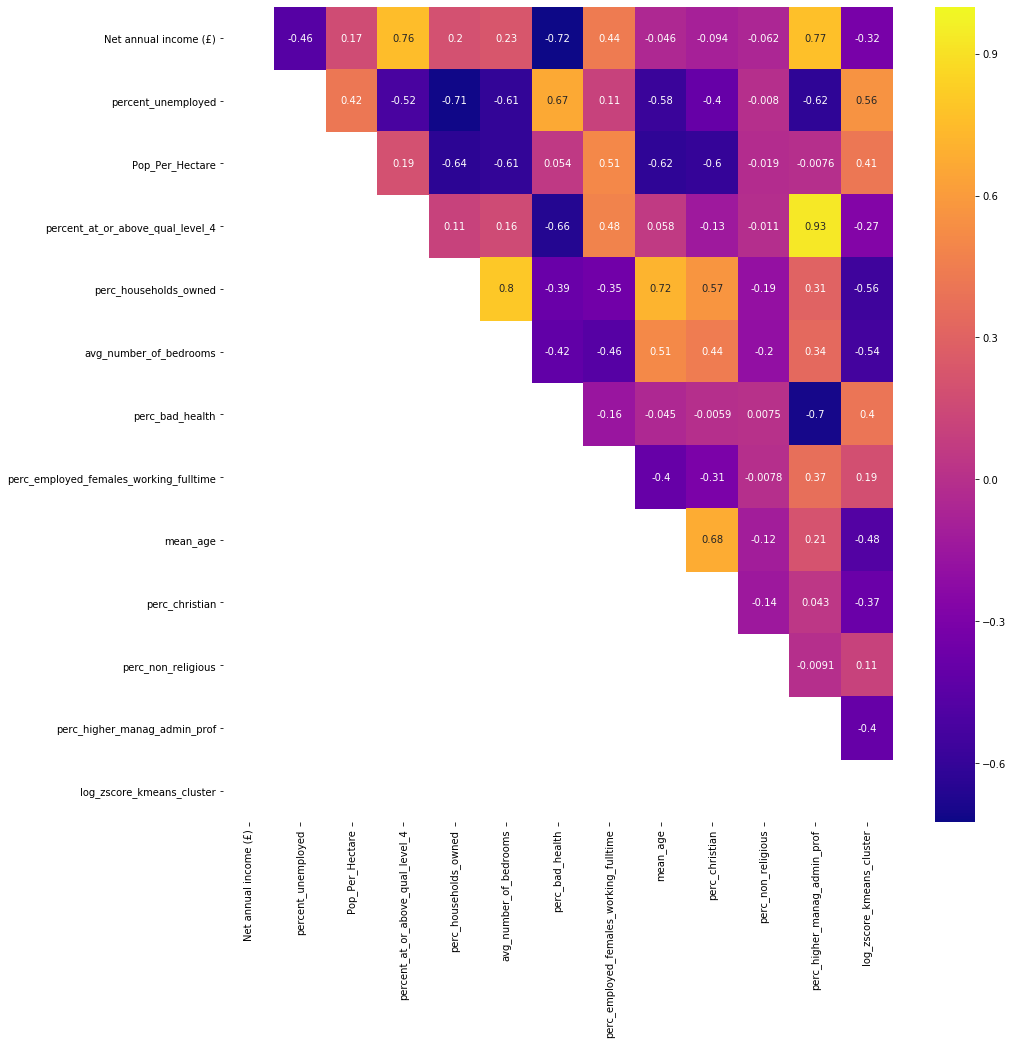

In [6]:
#plot  the correlation matrix showing the relationship between factors
fig, ax = plt.subplots(figsize=(15,15))

mask = np.tril(data.corr())

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True, cmap = "plasma", ax = ax, mask = mask)
plt.show()

In [7]:
# If two variables are highly correlated, drop one of them
data.drop(columns = ["perc_higher_manag_admin_prof"], inplace= True)

In [8]:
data

,Net annual income (£),percent_unemployed,Pop_Per_Hectare,percent_at_or_above_qual_level_4,perc_households_owned,avg_number_of_bedrooms,perc_bad_health,perc_employed_females_working_fulltime,mean_age,perc_christian,perc_non_religious,log_zscore_kmeans_cluster
0,"32,200.0000",3.2000,5.2000,26.7000,77.3803,2.8000,6.7089,61.3000,42.2000,72.2000,21.3000,3
1,"33,000.0000",3.0000,6.6000,25.1000,84.7895,2.9000,4.6146,55.4000,41.0000,74.8000,19.8000,3
2,"31,700.0000",3.3000,5.3000,32.8000,78.4107,3.0000,6.3795,60.4000,43.2000,72.6000,20.2000,3
3,"27,700.0000",4.6000,9.6000,19.3000,67.7488,2.7000,8.8388,59.1000,41.3000,70.8000,22.8000,3
4,"30,400.0000",5.0000,9.1000,16.0000,62.1527,2.6000,9.1204,54.5000,41.0000,69.4000,24.2000,3
5,"26,100.0000",5.7000,6.5000,15.2000,57.7485,2.6000,10.1743,55.1000,41.4000,69.0000,24.2000,3
6,"31,300.0000",3.1000,11.8000,28.3000,79.4777,2.8000,5.5584,54.2000,44.3000,75.8000,17.6000,3
7,"25,700.0000",7.3000,19.4000,10.8000,50.7283,2.6000,10.9400,56.5000,38.1000,63.5000,29.1000,3
8,"26,400.0000",6.8000,7.9000,13.7000,64.8725,2.6000,9.4617,55.6000,39.9000,67.6000,25.0000,3
9,"27,800.0000",3.4000,18.2000,22.2000,70.3027,2.6000,7.3754,62.3000,40.6000,76.5000,16.6000,3


We will add a random variable to evaluate feature importance. If variables are less important than a random variable, they are probably useless for our model. The random variable should have no influence on the predictive power of the model

In [9]:
# random seed for reproducability, we add this seed to the train_test_split() function below as well
np.random.seed(seed = 42)
data['random'] = np.random.random(size = len(data))

Organising and cleaning the data includes:

1. split the `data` into two datasets corresponding to predictors `X` and the response variable `y`
2. splt the datasets into training set and testing set

The data to be used here is what cluster does the MSOA belong to as given by our clustering algorithm outputs.

This requires splitting the dataset into one dataset containing the attribute data known as `attributes`, and one containing the classifications known as `y`.

In [10]:
attributes = data.drop("log_zscore_kmeans_cluster", axis = 1)
y = data["log_zscore_kmeans_cluster"]

Since we don't have any categorical variables we can convert the attributes and classifications into numpy arrays which is required to feed into the classifier algorithms

In [11]:
#this could be an issue but we shall see 
attributes.to_numpy()
y.to_numpy()

array([3, 3, 3, ..., 5, 5, 2], dtype=int64)

In [12]:
attributes.shape

(7201, 12)

In [13]:
y.shape

(7201,)

The final stage in data preprocessing involves splitting the prepared dataset into training and testing subsets. The training data will be used to create the classifier, the esting data will then be used to test the accuracy of the classification

This is done using the `train_test_split` method from `scikit`, which splits the attribute and label data into training and testing subsets.

This splots according to a 75:25 split, roughly in line with convention.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_a, test_a, train_lab, test_lab = train_test_split(attributes, y, random_state = 42)

## Decision tree

The first classification method we will use is that of a decision tree.

This takes two arrays as inputs: an array X of size `[n_smaples, n_featurs]` holding tha trainig samples, and an array Y of integer values, size `[n_samples]`, holding the class lables for the training samples.

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf_decision_tree = DecisionTreeClassifier()  
clf_decision_tree.fit(train_a, train_lab)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

To test the accuracy of the model on the training data.

In [17]:
print(f'Model Accuracy: {clf_decision_tree.score(train_a, train_lab)}')

Model Accuracy: 1.0


To test the accuracy of the the model on the test data

In [18]:
test_pred_decision_tree = clf_decision_tree.predict(test_a)

In [19]:
from sklearn import metrics
print (metrics.classification_report(test_lab, test_pred_decision_tree))

              precision    recall  f1-score   support

           1       0.63      0.63      0.63       523
           2       0.66      0.65      0.65       249
           3       0.42      0.41      0.42       284
           4       0.78      0.81      0.80       197
           5       0.64      0.65      0.64       548

    accuracy                           0.62      1801
   macro avg       0.63      0.63      0.63      1801
weighted avg       0.62      0.62      0.62      1801



### Confusion Matrix

In [20]:
# get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_decision_tree)

In [21]:
confusion_matrix

array([[328,  55,  40,  17,  83],
       [ 52, 161,  28,   0,   8],
       [ 53,  22, 117,   1,  91],
       [ 12,   0,   5, 160,  20],
       [ 73,   6,  89,  26, 354]], dtype=int64)

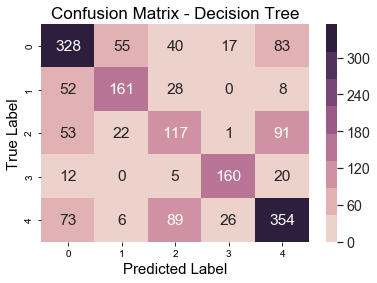

<Figure size 720x504 with 0 Axes>

In [22]:
# convert array to dataframe to plot
matrix_df = pd.DataFrame(confusion_matrix)

# set axis to add title and axis labels later
ax = plt.axes()
sns.set(font_scale=1.3) # for label size
plt.figure(figsize=(10,7))
cmap = sns.cubehelix_palette(8) # color palette
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap = cmap) #fmt so that numbers aren't scientific

#axis labels and title
ax.set_title('Confusion Matrix - Decision Tree', fontsize = 17)
ax.set_xlabel('Predicted Label', fontsize = 15)
ax.set_ylabel('True Label'     , fontsize = 15)
plt.show()
#matrix_df

### Accuracy 

The accuracy score is the fraction of True Positives and True Negatives Over the Total Number of Assigned Labels. It is basically:            

`sum(diagonals in the confusion matrix)` / `sum(all boxes in confusion matrix)`


It is a good measure "when the target variable classes in the data are nearly balanced". It should not be used if target variables are predominantly in one class

In [23]:
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.6218767351471405

### Precision

Precision tells us how many of the values we predicted to be in a certain class are actually in that class.

"Precision gives us information about model performance with respect to false positives"

For any class, it is equal to:

`True positive (number in diagonal)` / `All positives (column sum)`

In [24]:
precision = metrics.precision_score(test_lab, test_pred_decision_tree, average=None)
precision_results = pd.DataFrame(precision)

#rename results column
precision_results.rename(columns={0:'Precision'}, inplace=True)
precision_results

,Precision
0,0.6332
1,0.6598
2,0.4194
3,0.7843
4,0.6367


### Recall

Recall tells us how many of the values in each class were given the correct label.

"It gives us information about a classifier’s performance with respect to false negatives (how many did we miss)"

For any class, it is equal to:

`True positive (number in diagonal)` / `All assignments (row sum)`

In [25]:
recall = metrics.recall_score(test_lab, test_pred_decision_tree, average=None)
recall_results = pd.DataFrame(recall)

#rename results column
recall_results.rename(columns={0:'Recall'}, inplace=True)
recall_results

,Recall
0,0.6272
1,0.6466
2,0.4120
3,0.8122
4,0.6460


### f1

F1 is a weighted average of precision and recall. It uses the harmonic mean as opposed to the arithmetic mean so that the value is closer to the smaller number. this prevents overestimating the performance of the model in the case where one of the two parameters is very high and the other is very low. 

A good explanation can be found here:

https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b


In [26]:
f1 = metrics.f1_score(test_lab, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1)

#rename results column
f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
0,0.6302
1,0.6531
2,0.4156
3,0.7980
4,0.6413


Once trained we can then plot the tree

In [49]:
#change the type for the class
a = np.array(test_lab.unique())
a = a.astype('<U10')
a

array(['4', '5', '2', '3', '1'], dtype='<U10')

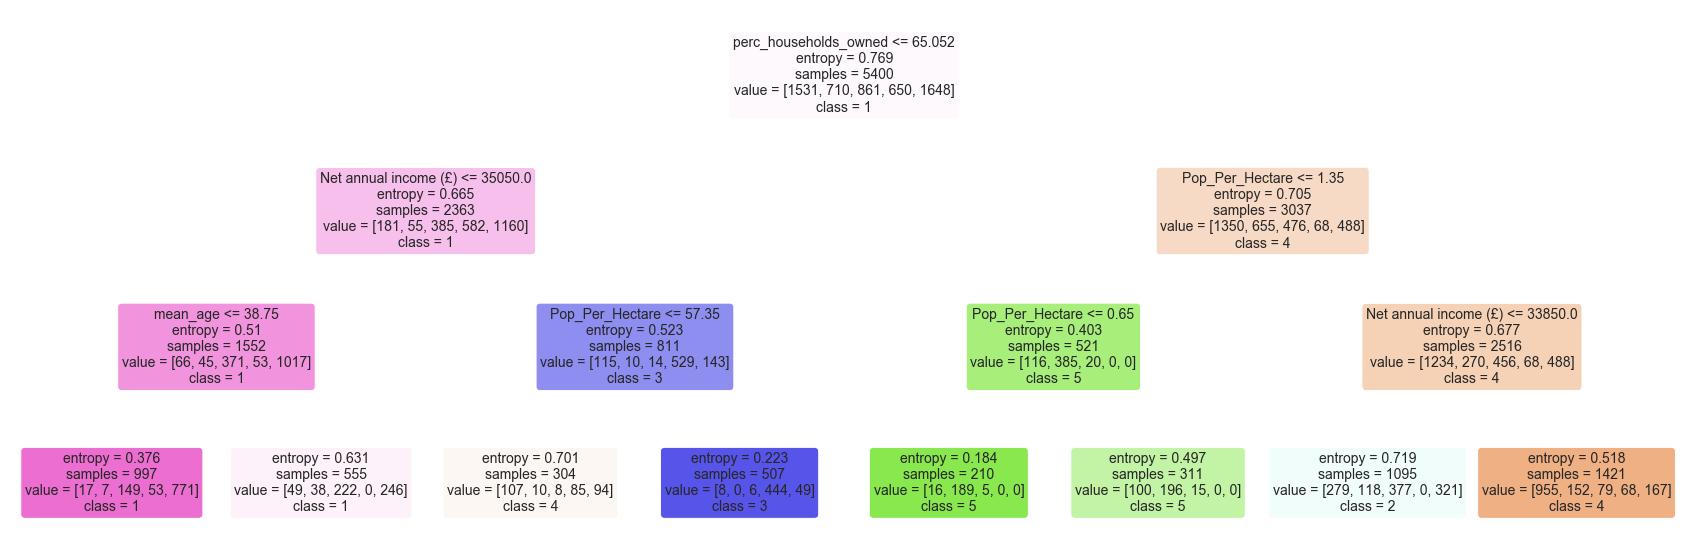

In [50]:
#https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2

from sklearn import tree

clf2 = DecisionTreeClassifier(max_depth = 3)
clf2.fit(train_a, train_lab)

plt.figure(figsize = (30,10))
a = tree.plot_tree(clf2,
             feature_names = attributes.columns,
             class_names = a,
             rounded = True,
             filled=True,
            fontsize = 14)

plt.savefig('decision_tree.png')

Here all nodes excpet the leaf nodes (terminal nodes which are coloured) all have 5 parts (leaf nodes don't have a question because they are where the final prediction is made:

1. Question asked about the data based on a value of a feature. Each is either true or false that splits the node
2. `gini`: the gini Impurity of the node. The average weighted Gini impurity decreases as we move down the tree
3. `samples`: the number of observations in the node
4. `value`: the nu of samples in each class
5. `class` the majority classification for points in the node. In the case of leaf nodes, this is the prediction for all samples in the node 

We can also view the rules in text format, which is more intuitive to read.

In [28]:
# # the code is based on this link: https://stackoverflow.com/a/57335067/4667568
# decision_tree_depth_5 = DecisionTreeClassifier(max_depth=5)
# from sklearn.tree import export_text
# tree_rules = export_text(clf2, feature_names=attributes.columns)
# print(tree_rules)

The gini impurity of a node is the probability that a randomly chosen sample in a node would be incorrectly labelled if it was labeled by the distribution of samples in the node.

At each node the decision tree searches through the features for the value to split on that results in the greatest reduction in Gini impurity (an alternative for this is the infromation gain).

Eventually the weighted total Gini impurity of the last layer goes to 0, so that each node is completely pure. This means that the model may be overfitting because the nodes are constructed only using training data.

To limit overfitting we can set a maximum depth such that it does not have exactly one leaf noe for every single observation. This will reduce the variance of the decision tree, but at the cost of increasing bias. 

An alternative to this is to combine many decision trees into a single ensemble known as the random forest

## Random forest classifier

This model utilises many trees instead of just one to undertsand the dataset. The final prediction of the random forest are made by averaging the predictions of each individual tree. 

This does so taking advantage of:
1. Random sampling of training data points when building trees
   - Each tree learns from a random sample of the data points. These random samples are drawn without replacement, known as bootstrapping
   - The idea is that by training each tree on different samples, although each tree might have high variance with respect to a particular set of the training data, overall the entire forest will have lower variance, but not at the cost of increasing bias
   - When testing, predictions are made by averaging the predictions of each decision tree
2. Random subsets of features considered when splitting nodes
    - Only a subset of all the features are considered for splitting each node in each decision tree

This requires you to specify `n_estimators` which specifies how many trees shsould be created in the construction of the whole forest. The more trees chosen, the longer this will take.

The benefit of this is that it injects some randomness into the fitting of trees to reduce overfitting seen as part of decision trees, and hence produces an overall better model


In [29]:
from sklearn.ensemble import RandomForestClassifier

#the number of estimators is the number of trees
clf = RandomForestClassifier(n_estimators=100, oob_score = True, max_depth = 3)
clf.fit(train_a, train_lab)
test_pred_random_forest = clf.predict(test_a)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(clf.score(train_a, train_lab), 
                                                                                             clf.oob_score_,
                                                                                             clf.score(test_a, test_lab)))


R^2 Training Score: 0.65 
OOB Score: 0.64 
R^2 Validation Score: 0.65


The max depth is how many branches the final model reaches. Here we set `max_depth` as 3 in order to be able to visualise the model. This results in a loss of accuracy but a gain in interpretability

##### Model is overfitting as OOB Score and Validation Score are lower than the Training Score

OOB score uses more data for the training set https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

In [30]:
#probabilities for each class
rf_probs = clf.predict_proba(test_a)[:, 1]

In [31]:
#for the training score and validation score
print('R^2 Training Score: ', clf.score(train_a, train_lab))
print("R^2 Validation Score: ", clf.score(test_a, test_lab))

R^2 Training Score:  0.65
R^2 Validation Score:  0.645752359800111


In [32]:
print (metrics.classification_report(test_lab, test_pred_random_forest))

              precision    recall  f1-score   support

           1       0.62      0.81      0.70       523
           2       0.83      0.52      0.64       249
           3       0.59      0.07      0.12       284
           4       0.77      0.76      0.76       197
           5       0.60      0.81      0.69       548

    accuracy                           0.65      1801
   macro avg       0.68      0.59      0.58      1801
weighted avg       0.66      0.65      0.60      1801



## Feature Importance

We can also calculate feature importance to figure out what features are most important.

This can be used for feature engineering and understanding what features are most important for our models.

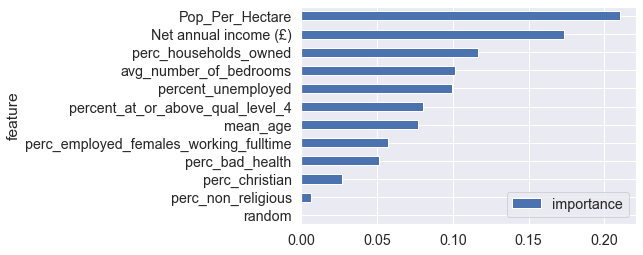

In [33]:
#print(clf.feature_importances_)
fi = pd.DataFrame({'feature': list(attributes.columns),
                  'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending=True)

plot = fi.plot.barh(x = 'feature', y = 'importance')

fig = plot.get_figure()
fig.savefig("Plots/feature_importance_rf.png", bbox_inches='tight')

### Permutation Importance

We  train the baseline model and calculate r^2. We then reshuffle one variable (e.g Pop_per_hectare) and run the model again. The difference in r^2 is the importance of that variable/feature

In [34]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances


def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

#get permutation importance scores
perm_imp_rfpimp = permutation_importances(clf, train_a, train_lab, r2)
#sort for plotting
perm_imp_rfpimp.sort_values('Importance', ascending=True, inplace = True)
#show
perm_imp_rfpimp

,Importance
Feature,
random,0.0000
avg_number_of_bedrooms,0.0049
perc_non_religious,0.0065
percent_at_or_above_qual_level_4,0.0192
perc_bad_health,0.0227
perc_christian,0.0277
perc_employed_females_working_fulltime,0.0288
percent_unemployed,0.0514
perc_households_owned,0.0554


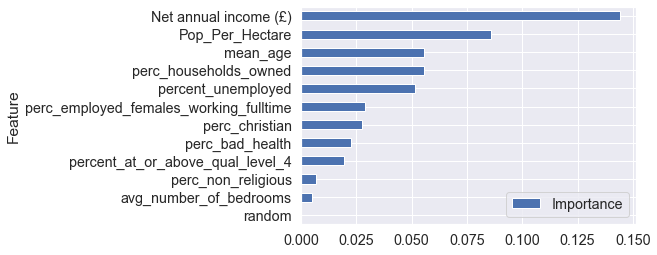

In [35]:
#plot
plot = perm_imp_rfpimp.plot.barh()
#save
fig = plot.get_figure()
fig.savefig("Plots/permutation_importance_rf.png", bbox_inches='tight')

In [36]:
# get the confusion matrix
confusion_matrix2 = metrics.confusion_matrix(test_lab, test_pred_random_forest)
confusion_matrix2

array([[423,  16,   5,  14,  65],
       [ 93, 129,   8,   0,  19],
       [ 80,  10,  19,   2, 173],
       [ 15,   0,   0, 149,  33],
       [ 76,   0,   0,  29, 443]], dtype=int64)

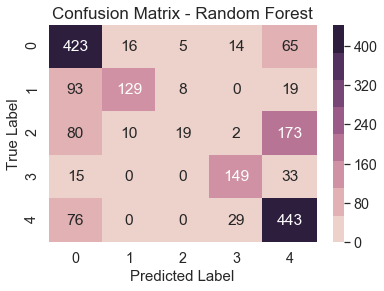

<Figure size 720x504 with 0 Axes>

In [37]:
# convert array to dataframe to plot
matrix2_df = pd.DataFrame(confusion_matrix2)

# set axis to add title and axis labels later
ax = plt.axes()
sns.set(font_scale=1.3) # for label size
plt.figure(figsize=(10,7))
cmap = sns.cubehelix_palette(8) # color palette
plot = sns.heatmap(matrix2_df, annot=True, fmt='g', ax=ax, cmap = cmap) #fmt so that numbers aren't scientific

#axis labels and title
ax.set_title('Confusion Matrix - Random Forest', fontsize = 17)
ax.set_xlabel('Predicted Label', fontsize = 15)
ax.set_ylabel('True Label'     , fontsize = 15)
plt.show()
#matrix_df

fig = plot.get_figure()
fig.savefig("Plots/confusion_matrix_rf.png", bbox_inches='tight')

### Visualisation

The random forest classification method produces an overall score as a result of many trees. The way to visualise the results is to visualise individual trees to see how the model has been trained.

In [38]:
estimator = clf.estimators_[5]
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1259922770, splitter='best')

In [39]:
#change the type for the class
a = np.array(test_lab.unique())
a = a.astype('<U10')
a

array(['4', '5', '2', '3', '1'], dtype='<U10')

In [40]:
#https://www.youtube.com/watch?v=SMGEmCOUBUw

import pydotplus
from sklearn.tree import export_graphviz 

#creating a function to create plots
def save_decision_tree_as_png(clf, iteration, feature_name):
    #change the file name over each iteration
    file_name = "rf_" + str(iteration) + ".png"
    #create the graph to export
    dot_data = export_graphviz(
        #use the clf function from above
        clf,
        #don't output the file yet
        out_file = None,
        #the feature names are those as defined above using the column titles
        feature_names = feature_name,
        #the class names are as defined above
        class_names = a,
        #creating the settings for the boxes themselves
        rounded = True,
        proportion = False,
        precision = 2,
        filled =True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    #write the graph as a png to the file name
    graph.write_png(file_name)
    #print that it is being saved
    print("Decision Tree {} saved as png file".format(iteration +1))

In [41]:
#get the number of estimators (set at 100)
len(clf.estimators_)

100

In [42]:
#for a given range call the function above and print the pngs to be checked outside
for i in range(45,55):
    save_decision_tree_as_png(clf.estimators_[i], i, attributes.columns)

Decision Tree 46 saved as png file
Decision Tree 47 saved as png file
Decision Tree 48 saved as png file
Decision Tree 49 saved as png file
Decision Tree 50 saved as png file
Decision Tree 51 saved as png file
Decision Tree 52 saved as png file
Decision Tree 53 saved as png file
Decision Tree 54 saved as png file
Decision Tree 55 saved as png file


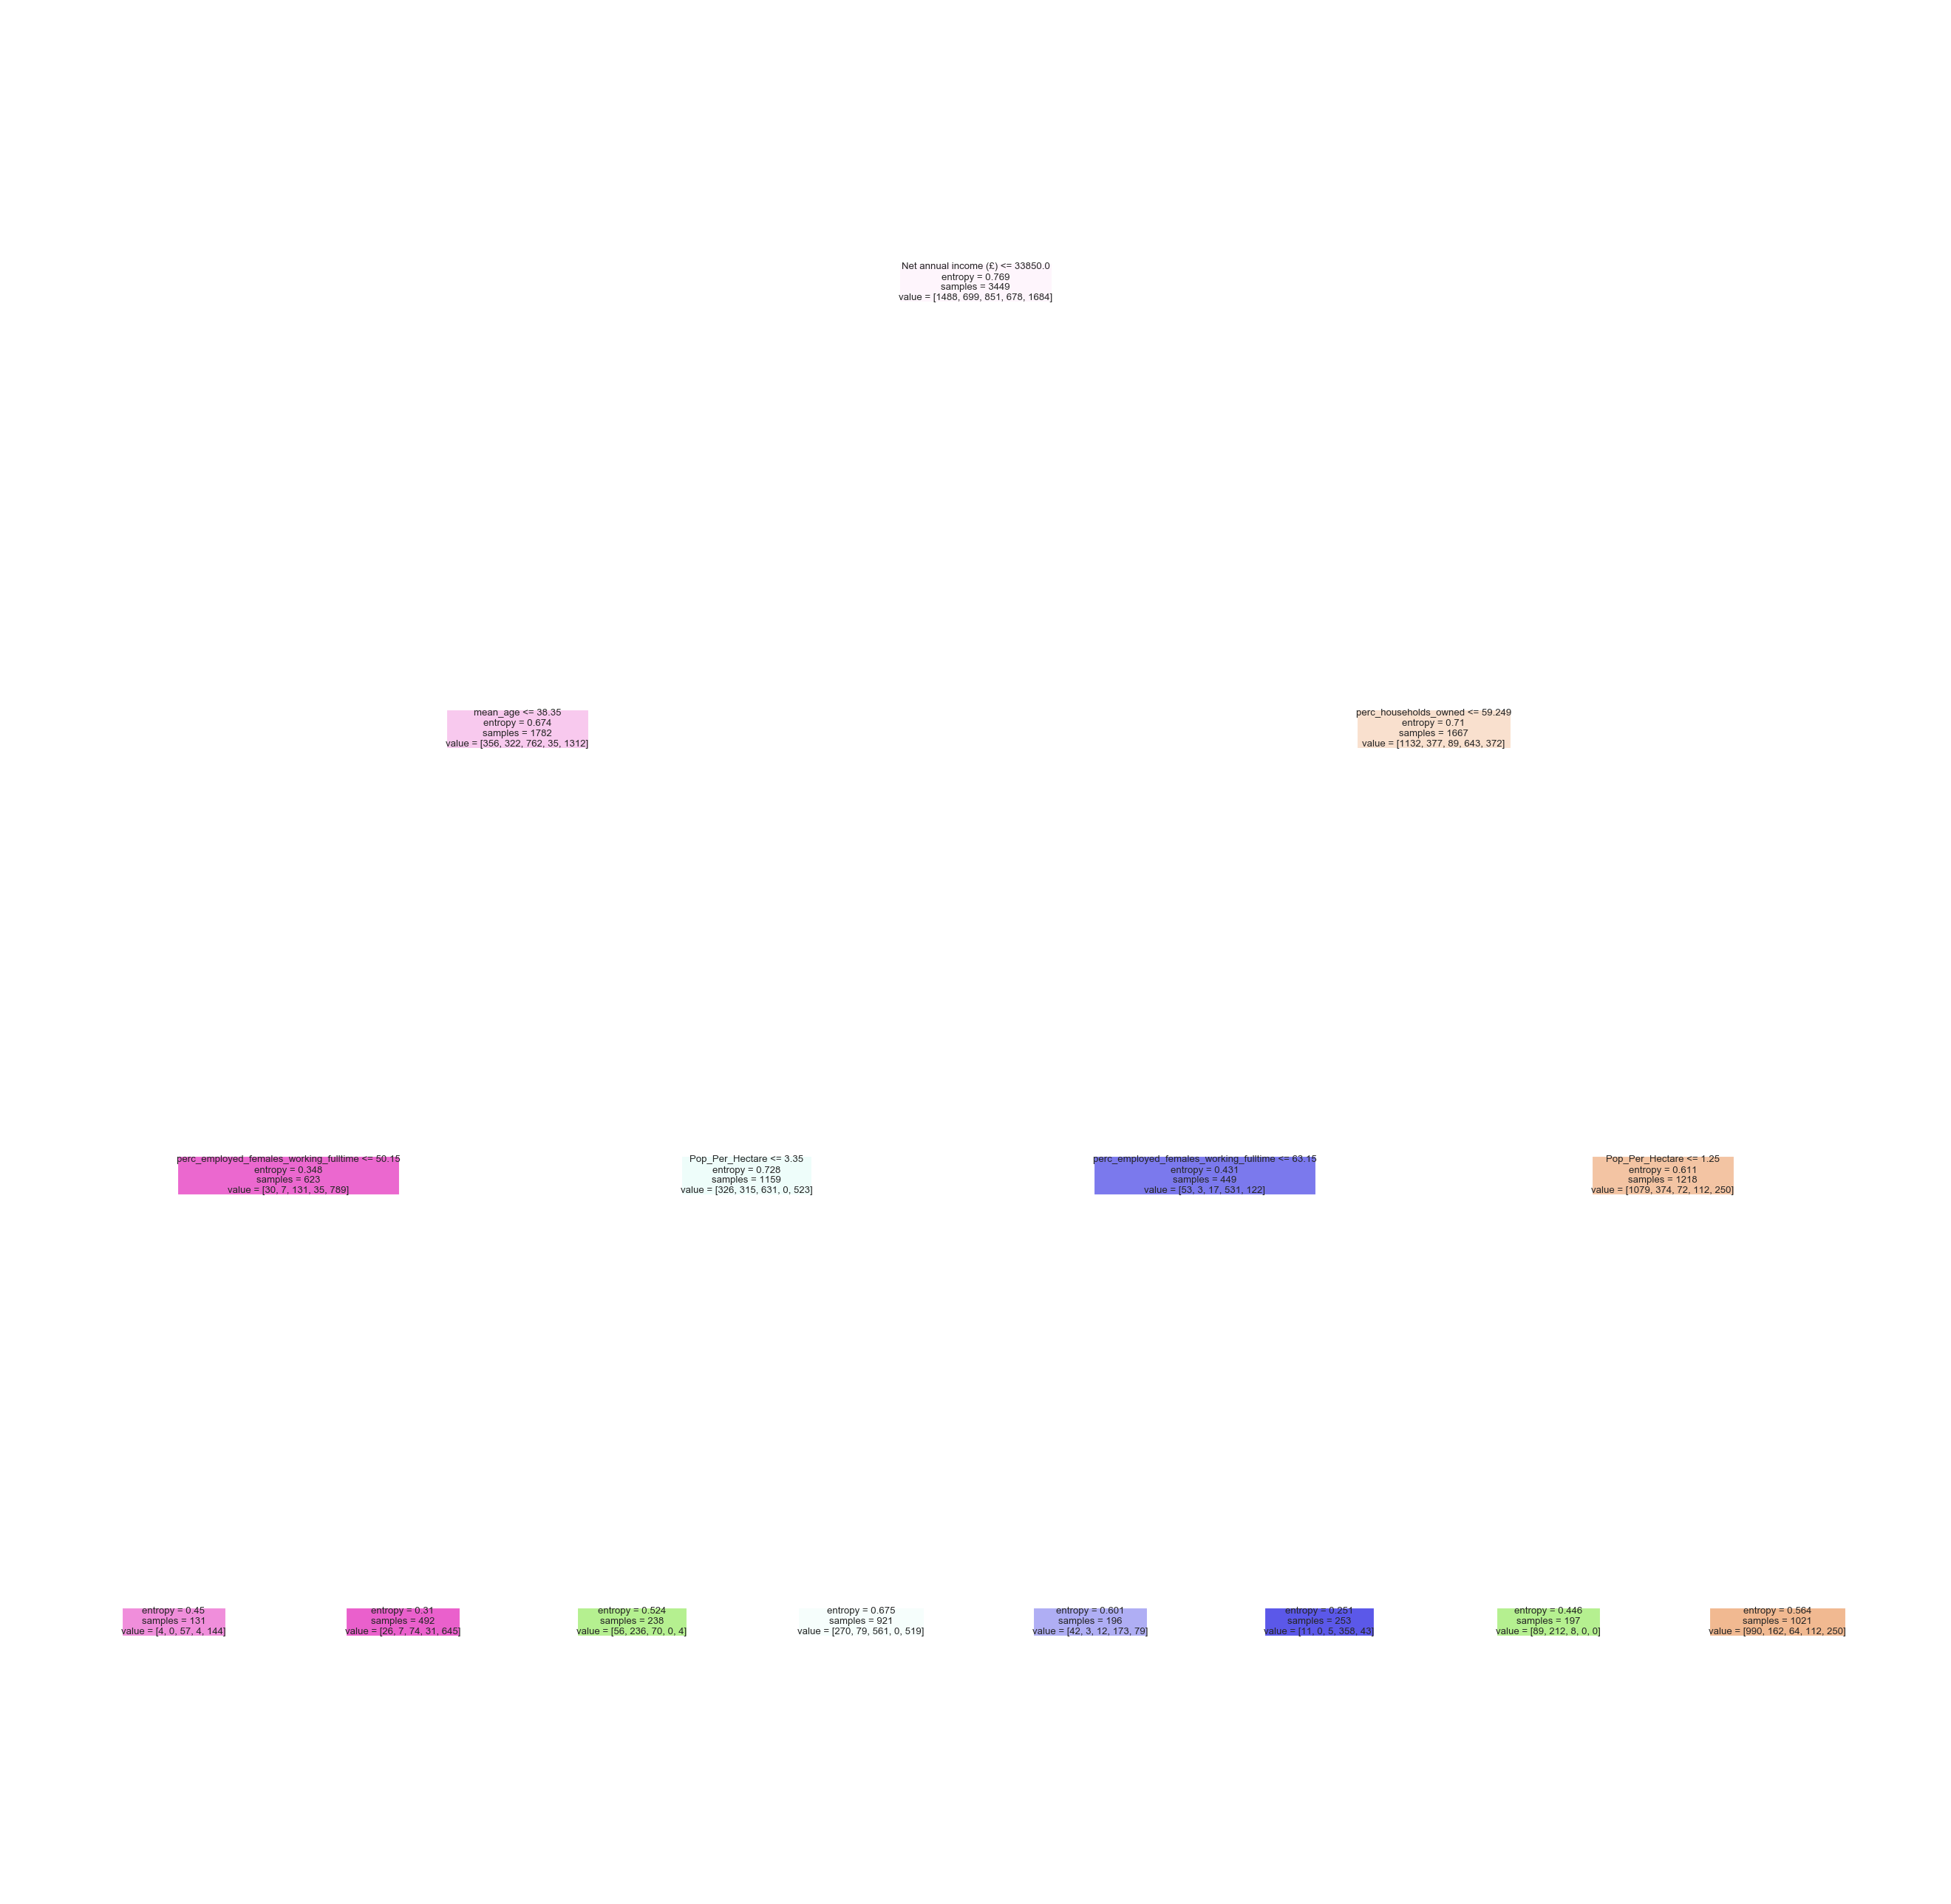

In [43]:
#an alternative way of looking at it
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[5],
               feature_names = attributes.columns, 
               filled = True);
fig.savefig('rf_individualtree.png')

In [44]:
#to install packages
#conda install -c conda-forge pydotplus

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76